# **Imports**

In [256]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
import missingno as msno
from IPython.display import display
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

# **Mounting drive and defining the file path**

In [257]:
#from google.colab import drive
#drive.mount('/content/drive')

In [258]:
file_path = 'diabetes.csv'

# **Loading Dataset**

In [259]:
import pandas as pd


# Load the diabetes dataset
try:
  df = pd.read_csv(file_path)
except FileNotFoundError:
  print("Error: diabetes.csv not found. Please upload the file to your current working directory.")


# **Data info**

In [260]:
# header
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [261]:
# (row, columns)
df.shape

(768, 9)

In [262]:
# distribution percentage of outcome variable
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [263]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

<Axes: xlabel='Age', ylabel='Count'>

In [264]:
print("Maximum available age: "+str(df['Age'].max()))
print("Minimum available age: "+str(df['Age'].min()))

Maximum available age: 81
Minimum available age: 21


# **Data Anlysis and data mining using ML**

## **EDA** (Exploratory Data Analysis)

In [265]:
fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

<Axes: xlabel='Age', ylabel='Density'>

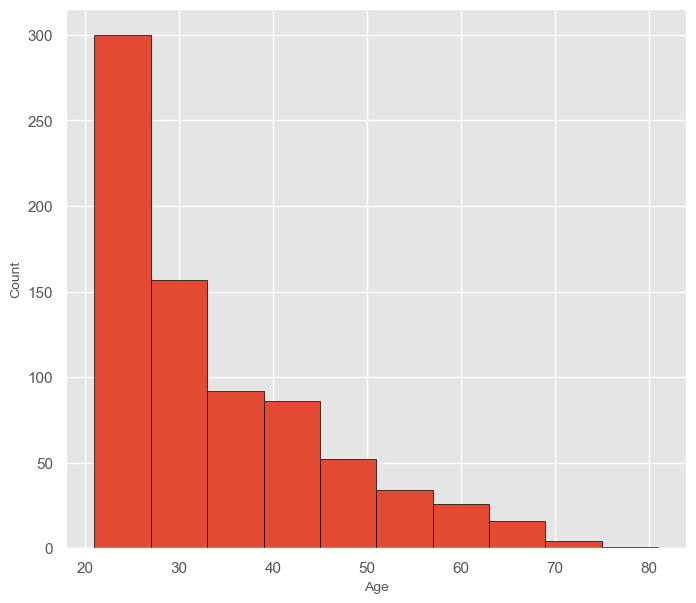

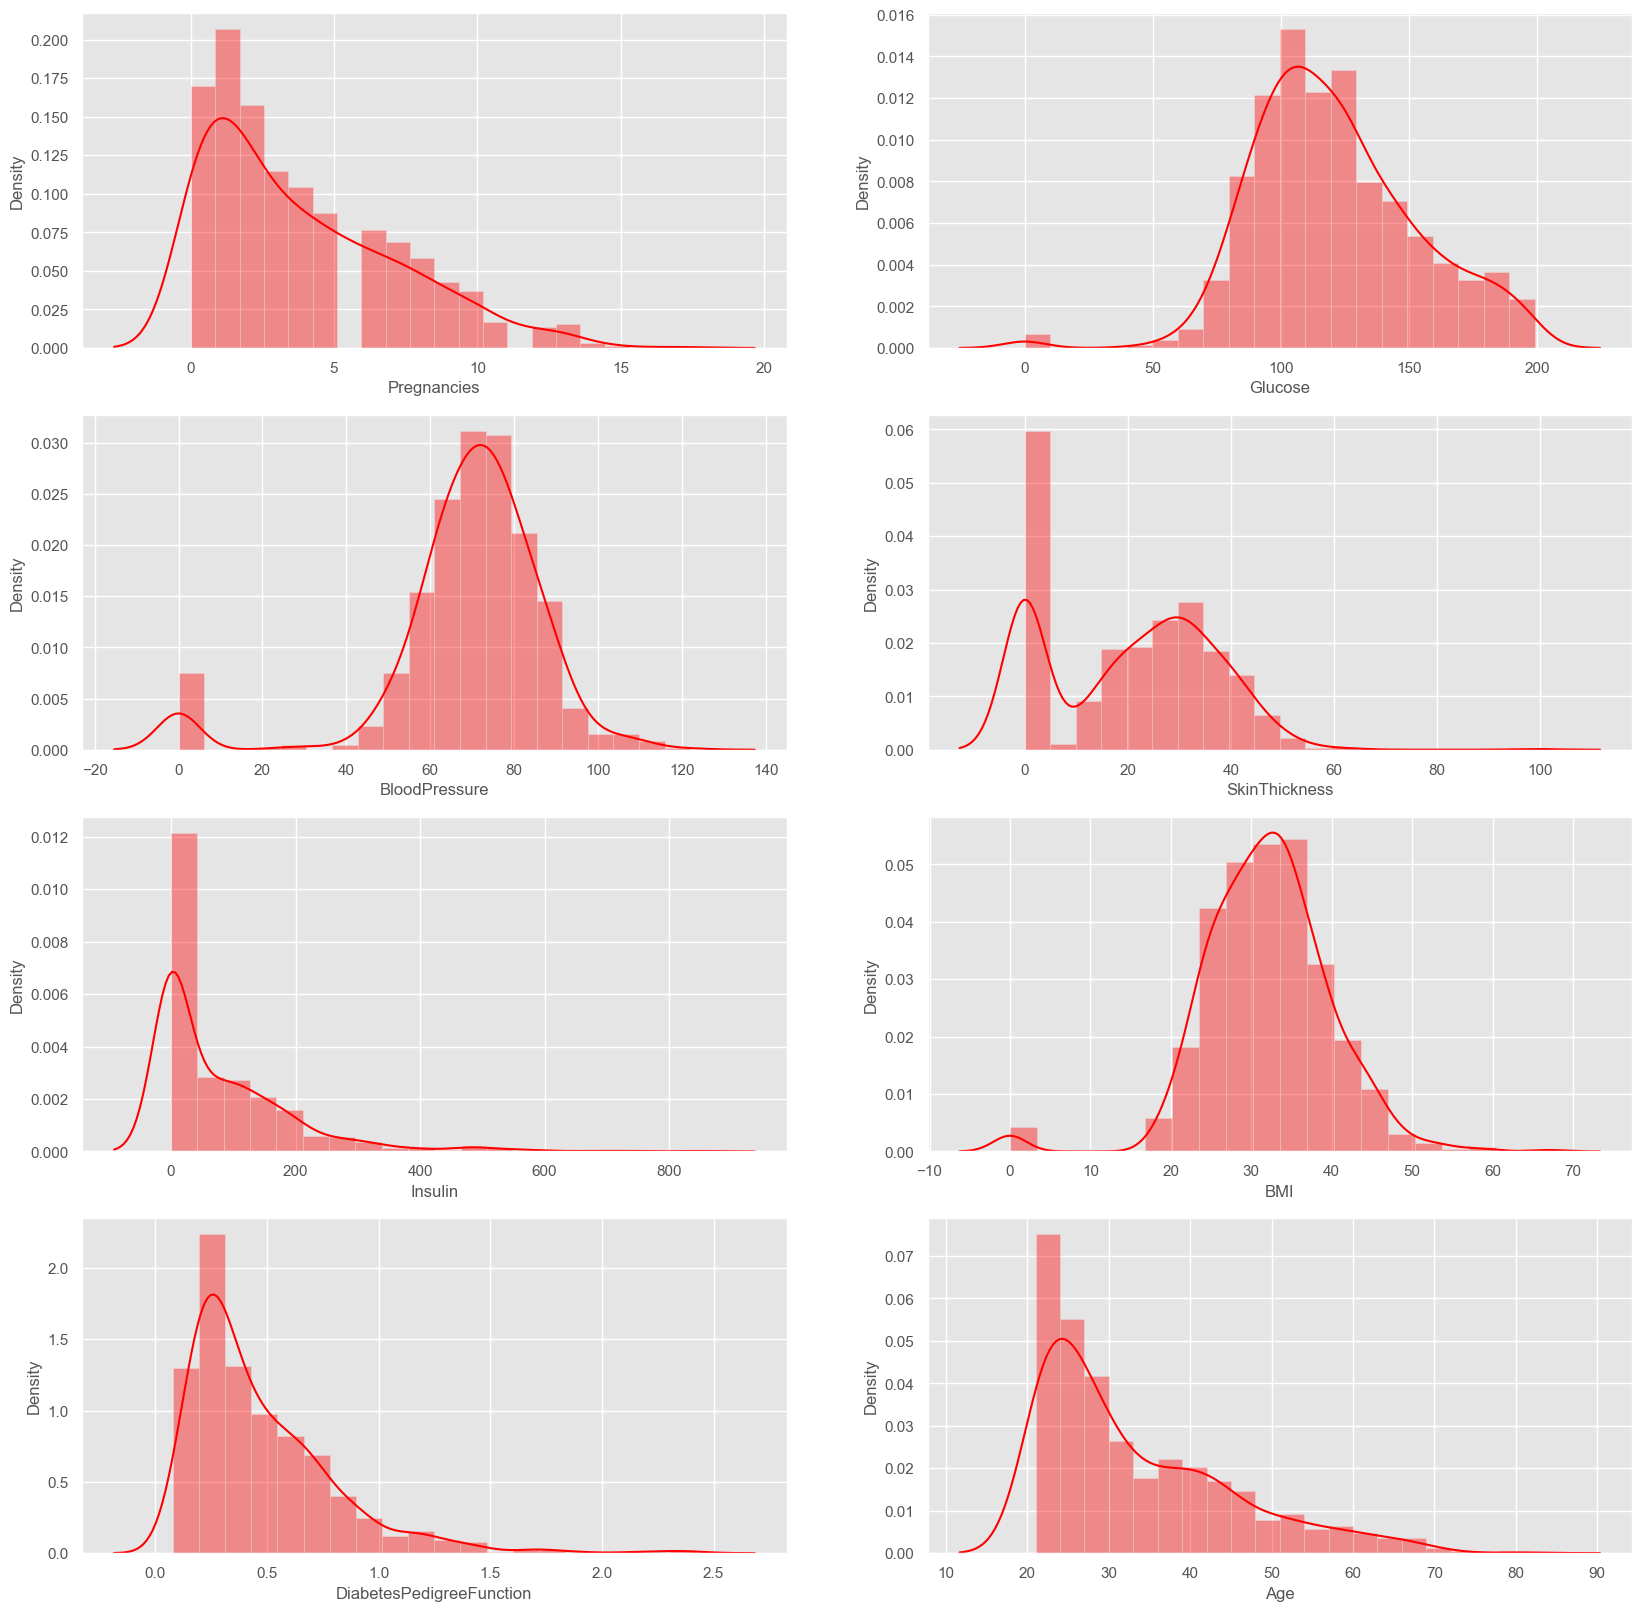

<Figure size 1500x1000 with 0 Axes>

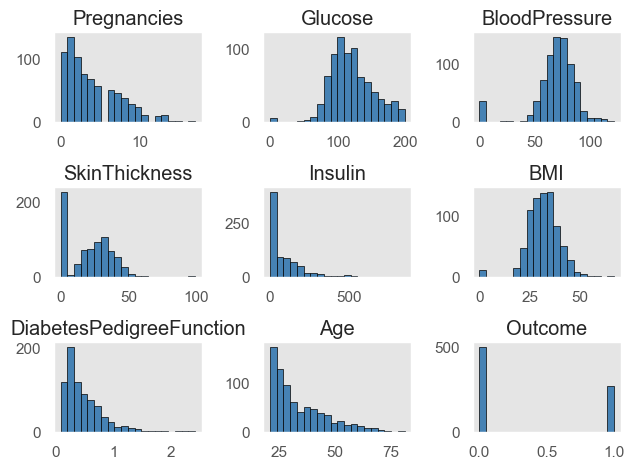

In [266]:
# Histograms to visualize the distribution of variables
plt.figure(figsize=(15, 10))
df.hist(bins=20, color='steelblue', edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

### Data relationships

In [267]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


 Among patients without diabetes (Outcome = 0), what is the maximum number of pregnancies!

In [268]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


Among patients with and without diabetes, what is the average glucose level!

In [269]:
df.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


 Among patients without diabetes (Outcome = 0), what is the maximum value of Glucose!

In [270]:
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


In [271]:
df.groupby("Outcome").agg({'Insulin':'mean'})

,Insulin
Outcome,
0,68.792000
1,100.335821


 Among patients with or without diabetes (Outcome = 0), what is the maximum value of Insulin!

In [272]:
df.groupby("Outcome").agg({'Insulin':'max'})

,Insulin
Outcome,
0,744
1,846


In [273]:
df.groupby("Outcome").agg({'SkinThickness':'mean'})

,SkinThickness
Outcome,
0,19.664000
1,22.164179


 Among patients with or without diabetes (Outcome = 0), what is the maximum skin thickness!

In [274]:
df.groupby("Outcome").agg({'SkinThickness':'max'})

,SkinThickness
Outcome,
0,60
1,99


In [275]:
df.groupby("Outcome").agg({'BloodPressure':'mean'})

,BloodPressure
Outcome,
0,68.184000
1,70.824627


 Among patients without diabetes (Outcome = 0), what is the maximum value of Blood pressure!

In [276]:
df.groupby("Outcome").agg({'BloodPressure':'max'})

,BloodPressure
Outcome,
0,122
1,114


In [277]:
df.groupby("Outcome").agg({'BMI':'mean'})

,BMI
Outcome,
0,30.304200
1,35.142537


 Among patients without diabetes (Outcome = 0), what is the maximum value of BMI!

In [278]:
df.groupby("Outcome").agg({'BMI':'max'})

,BMI
Outcome,
0,57.3
1,67.1


In [279]:
df.groupby("Outcome").agg({'Age':'mean'})

,Age
Outcome,
0,31.190000
1,37.067164


 Among patients without diabetes (Outcome = 0), what is the maximum Age can person reach in this dataset!

In [280]:
df.groupby("Outcome").agg({'Age':'max'})

,Age
Outcome,
0,81
1,70


In [281]:
df.groupby("Outcome").agg({'DiabetesPedigreeFunction':'mean'})

,DiabetesPedigreeFunction
Outcome,
0,0.429734
1,0.550500


 Among patients without diabetes (Outcome = 0), what is the maximum value of DiabetesPedigreeFunction!

In [282]:
df.groupby("Outcome").agg({'DiabetesPedigreeFunction':'max'})

,DiabetesPedigreeFunction
Outcome,
0,2.329
1,2.420


In [283]:
print("\n descriptive Statistics  :")
display(df.describe())


 descriptive Statistics  :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


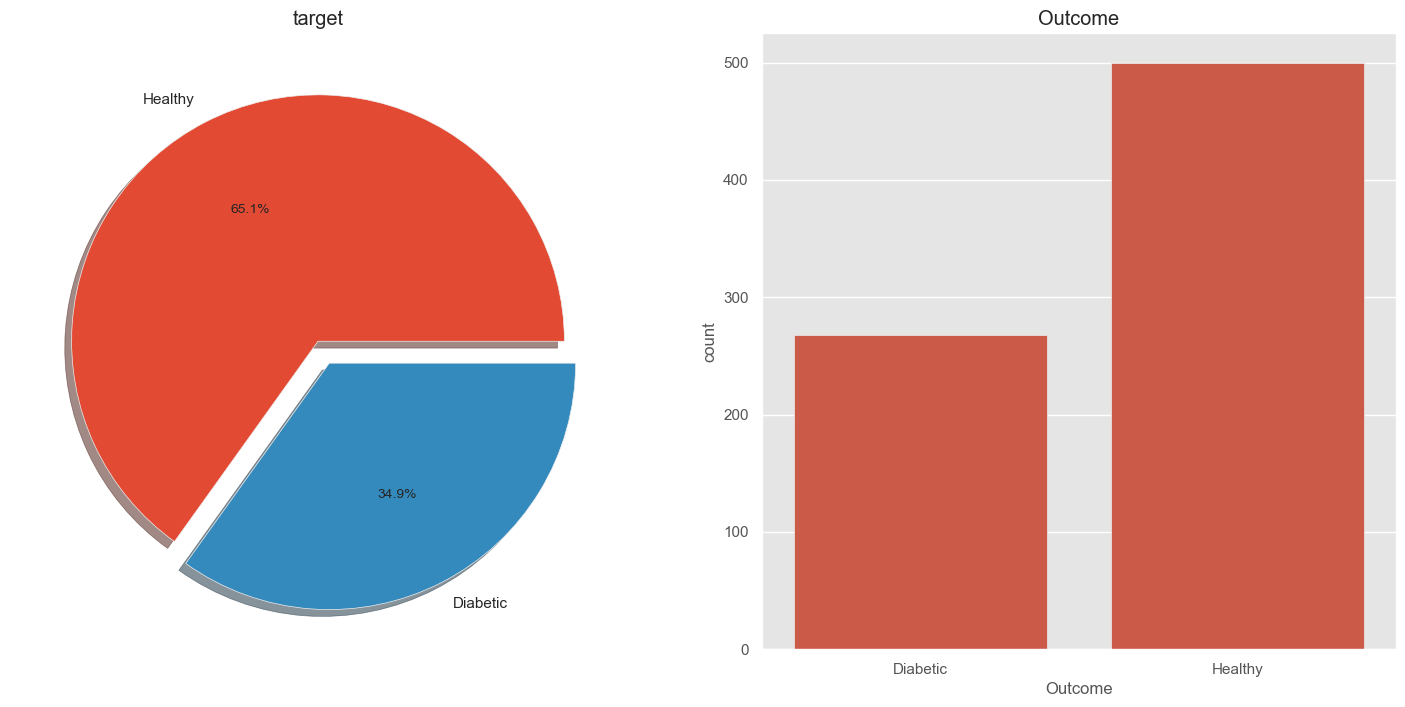

In [284]:
f,ax = plt.subplots(1,2, figsize=(18,8))
df_x = df.copy()
df_x['Outcome'] = df_x['Outcome'].map({0: 'Healthy', 1: 'Diabetic'})
df_x['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df_x, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

#### **Observations**

In [285]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


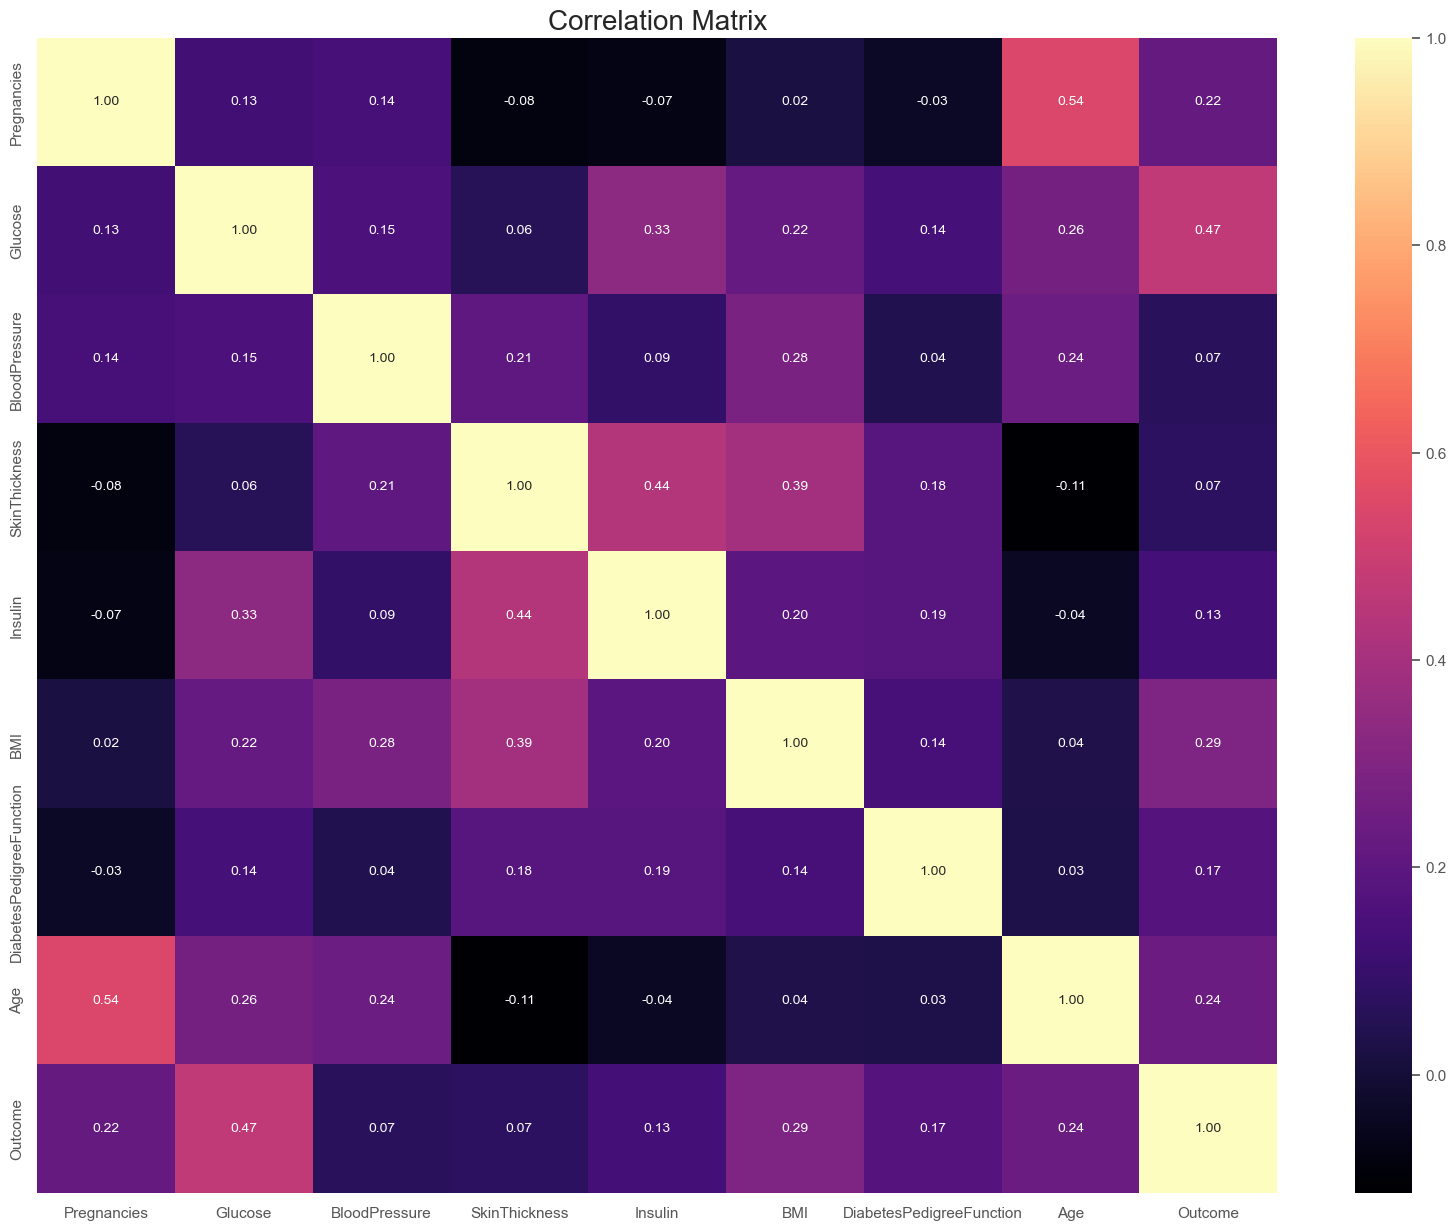

In [286]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

The strongest positive correlations are:

* Age and Pregnancies (0.54): Older individuals tend to have had more pregnancies
* Glucose and Outcome (0.47): Higher glucose levels are moderately associated with positive diabetes outcomes
* SkinThickness and Insulin (0.44): Skin thickness measurements correlate with insulin levels

Notable relationships with the Outcome variable (likely indicating diabetes diagnosis):

* Glucose (0.47): Strongest predictor of outcome
* BMI (0.29): Moderate association
* Age (0.24): Moderate association
* Pregnancies (0.22): Weak to moderate association

Weaker or negative correlations:

* SkinThickness and Pregnancies (-0.08): Very slight negative relationship
* Insulin and Pregnancies (-0.07): Very slight negative relationship
* SkinThickness and Age (-0.11): Slight negative relationship

The data suggests **glucose level** is the strongest single indicator for diabetes **outcome** in this dataset, while factors like BMI, age, and pregnancy history also show meaningful associations with diabetes status.

## **Data preprocessing**


In [287]:
# Management of missing or outliers
msno.bar(df, color="blue")

<Axes: >

In [288]:
# There is no Nan value but we can also check it using isnull()
missing_values = df.isnull().sum()
print("Missing valeus per column :")
print(missing_values)

Missing valeus per column :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [289]:
# Checking for which columns have 0 as a value and how many
zero_counts = (df == 0).sum()
columns_with_zeros = zero_counts[zero_counts > 0]

print("Number of columns containing at least one zero:", len(columns_with_zeros))
print("Zero counts per column:")
print(columns_with_zeros)

Number of columns containing at least one zero: 7
Zero counts per column:
Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64


In [290]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


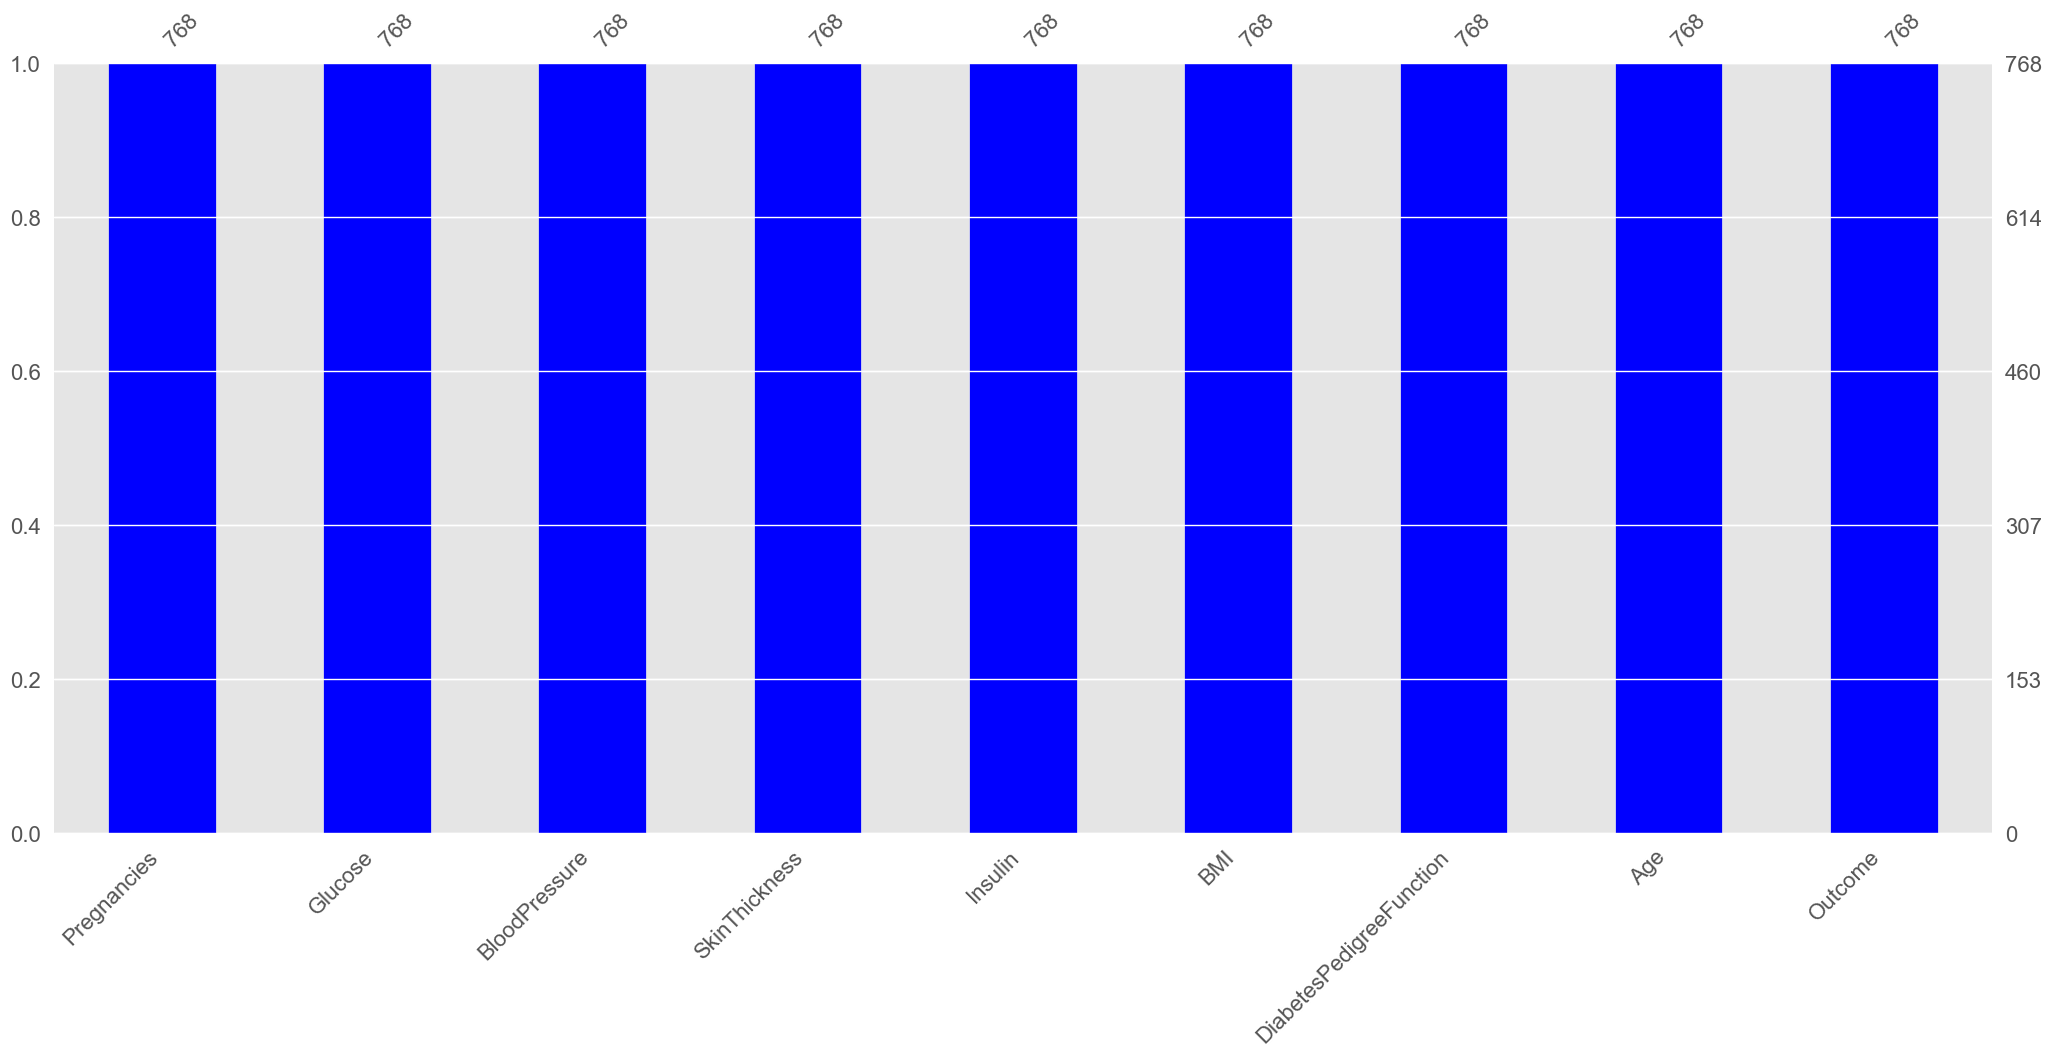

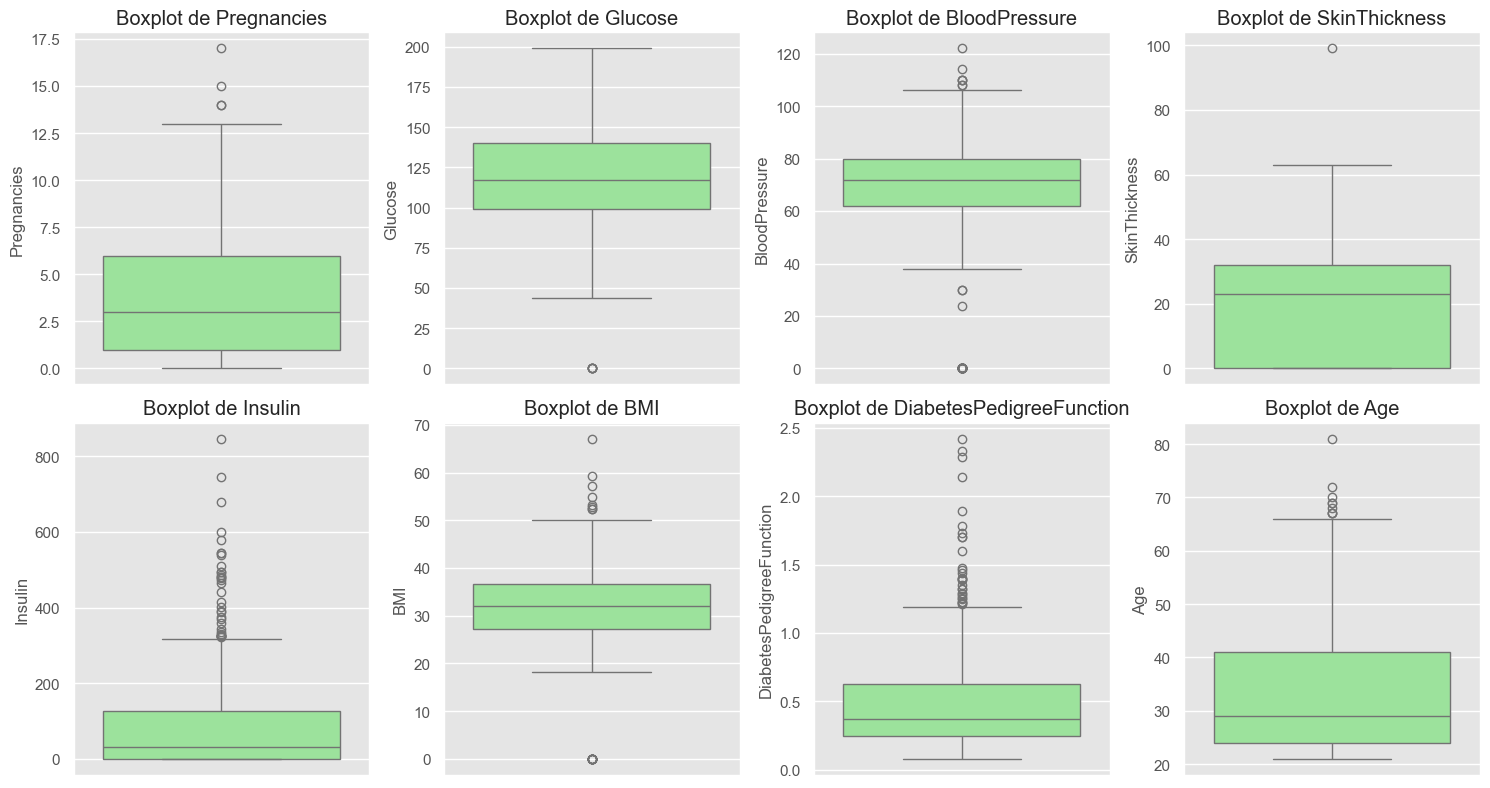

In [291]:
import seaborn as sns
# Boxplots to detect outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(df.columns[:-1], 1):  # on exclut Outcome
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

These approaches complement each other perfectly:

The first gives us a programmatic yes/no answer about outliers

The second allow us to visually assess the severity and pattern of outliers

In [292]:
# Treated Columns
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Afficher le nombre de 0 présents dans chaque colonne
for col in cols_to_check:
    n_zero = (df[col] == 0).sum()
    print(f"Nomber of 0 (missed value) in {col} : {n_zero}")


Nomber of 0 (missed value) in Glucose : 5
Nomber of 0 (missed value) in BloodPressure : 35
Nomber of 0 (missed value) in SkinThickness : 227
Nomber of 0 (missed value) in Insulin : 374
Nomber of 0 (missed value) in BMI : 11


### Mehtode 0: Median

The use of the median is a robust approach to outliers.

In [293]:
# Method 0: Imputation by median according to Outcome
def impute_by_median_per_outcome(df):

    # Create a copy to avoid modifying the original dataframe
    df_copy = df.copy()

    # For each possible Outcome value (0 and 1)
    for outcome in [0, 1]:
        # Create a subset for each outcome group
        subset = df_copy[df_copy['Outcome'] == outcome]

        # For each column to check
        for col in cols_to_check:
            # Calculate median of non-zero values for this outcome group
            median_val = subset[subset[col] != 0][col].median()

            # Replace zeros with the calculated median for this group
            df_copy.loc[(df_copy['Outcome'] == outcome) & (df_copy[col] == 0), col] = median_val

    return df_copy

### Methode 1: Domain knowledge

This method uses specific medical knowledge to replace missing values but it may differe from one person to another.

In [294]:
# Method 1: Imputation with predefined values according to Outcome
def impute_by_predefined_values(df):

    # Create a copy to avoid modifying the original dataframe
    df_copy = df.copy()

    # Define predefined values for each Outcome group
    impute_values = {
        0: {  # Non-diabetic
            'Glucose': 90,
            'BloodPressure': 70,
            'SkinThickness': 20,
            'Insulin': 70,
            'BMI': 22.5
        },
        1: {  # Diabetic
            'Glucose': 153,
            'BloodPressure': 85,
            'SkinThickness': 27,
            'Insulin': 175,
            'BMI': 29
        }
    }

    # Replace zeros with imputed values based on Outcome
    for outcome in [0, 1]:
        for column, value in impute_values[outcome].items():
            df_copy.loc[(df_copy['Outcome'] == outcome) & (df_copy[column] == 0), column] = value

    return df_copy


### Methode 2: KNN

This method considers the similarity between observations to impute values, which can be interesting for capturing complex relationships. However, for medical data, this approach can sometimes produce results that are difficult to interpret clinically.

In [295]:
# Method 2: KNN Imputation according to Outcome
from sklearn.impute import KNNImputer
def impute_by_knn_per_outcome(df, n_neighbors=20):

    # Create a copy to avoid modifying the original dataframe
    df_copy = df.copy()

    # For each possible Outcome value
    for outcome in [0, 1]:
        # Create a subset for each outcome group
        subset = df_copy[df_copy['Outcome'] == outcome].copy()

        # Check if we have enough observations for KNN
        if len(subset) > n_neighbors:
            # Initialize KNN imputer
            imputer = KNNImputer(n_neighbors=min(n_neighbors, len(subset) - 1))

            # Apply KNN only on columns to impute
            subset_cols = subset[cols_to_check]
            imputed_data = imputer.fit_transform(subset_cols)

            # Replace imputed data in the original dataframe
            for i, col in enumerate(cols_to_check):
                # Only replace values that were originally zero
                df_copy.loc[(df_copy['Outcome'] == outcome) & (df_copy[col] == 0), col] = imputed_data[:, i][subset[col] == 0]
        else:
            # If not enough observations, use median instead
            for col in cols_to_check:
                median_val = subset[subset[col] != 0][col].median()
                df_copy.loc[(df_copy['Outcome'] == outcome) & (df_copy[col] == 0), col] = median_val

    return df_copy



### Methode 3: Mean

Imputation by the mean is very sensitive to extreme values. In this case, it produces abnormally high values for insulin, which may distort subsequent analyses and does not reflect clinical reality.

In [296]:
# Method 3: Imputation by mean according to Outcome
def impute_by_mean_per_outcome(df):

    # Create a copy to avoid modifying the original dataframe
    df_copy = df.copy()

    # For each possible Outcome value
    for outcome in [0, 1]:
        # Create a subset for each outcome group
        subset = df_copy[df_copy['Outcome'] == outcome]

        # For each column to check
        for col in cols_to_check:
            # Calculate mean of non-zero values for this outcome group
            mean_val = subset[subset[col] != 0][col].mean()

            # Replace zeros with the calculated mean for this group
            df_copy.loc[(df_copy['Outcome'] == outcome) & (df_copy[col] == 0), col] = mean_val

    return df_copy

### Applying methodes

In [297]:
# Applying diff methodes
df_median = impute_by_median_per_outcome(df)
df_knn = impute_by_knn_per_outcome(df)
df_mean = impute_by_mean_per_outcome(df)
df_predefined = impute_by_predefined_values(df)

### Visualise the header of each dataframe

In [298]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [299]:
df_median.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


In [300]:
df_predefined.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,175,33.6,0.627,50,1
1,1,85,66,29,70,26.6,0.351,31,0
2,8,183,64,27,175,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [301]:
df_knn.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [302]:
df_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1


In [303]:
zero_counts = pd.concat([
    (df_median == 0).sum(),
    (df_predefined == 0).sum(),
    (df_mean == 0).sum(),
    (df_knn == 0).sum()
], axis=1)

zero_counts.columns = ['Median Imputation', 'Domain Knowledge', 'Mean Imputation', 'KNN Imputation']

print(zero_counts)


                          Median Imputation  Domain Knowledge  \
Pregnancies                             111               111   
Glucose                                   0                 0   
BloodPressure                             0                 0   
SkinThickness                             0                 0   
Insulin                                   0                 0   
BMI                                       0                 0   
DiabetesPedigreeFunction                  0                 0   
Age                                       0                 0   
Outcome                                 500               500   

                          Mean Imputation  KNN Imputation  
Pregnancies                           111             111  
Glucose                                 0               5  
BloodPressure                           0              35  
SkinThickness                           0             227  
Insulin                                 0        

### **Decision**

Imputation by **median** approach is the most logical because it:

**Respects the biological plausibility of the dataset given.**

This approach is particularly important for a diabetes dataset where relationships between variables are complex and the clinical interpretation of results is essential.

### Feature Enginnering

In [304]:
df = df_median
del df_median

In [305]:
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [306]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [307]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [308]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [309]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [310]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148,72.0,35,169.5,33.6,0.627,50,1,Obesity 2,Abnormal,Secret
1,1,85,66.0,29,102.5,26.6,0.351,31,0,Obesity 2,Normal,Normal
2,8,183,64.0,32,169.5,23.3,0.672,32,1,Obesity 2,Abnormal,Secret
3,1,89,66.0,23,94.0,28.1,0.167,21,0,Obesity 2,Normal,Normal
4,0,137,40.0,35,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [311]:
# One hot encoding(prepare categorical variables for machine learning models that require numeric inputs)
df = pd.get_dummies(df, columns=["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True).astype(int)

In [312]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148,72,35,169,33,0,50,1,0,1,0,0,0,0,0,0,0,1
1,1,85,66,29,102,26,0,31,0,0,1,0,0,0,1,0,1,0,0
2,8,183,64,32,169,23,0,32,1,0,1,0,0,0,0,0,0,0,1
3,1,89,66,23,94,28,0,21,0,0,1,0,0,0,1,0,1,0,0
4,0,137,40,35,168,43,2,33,1,0,0,1,0,0,0,0,0,0,1


In [313]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [314]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]


In [315]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [316]:
# numeric features
# Seperating target variable from the test/train variables
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [317]:
cols = X.columns
index = X.index

In [318]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,169,33,0,50
1,1,85,66,29,102,26,0,31
2,8,183,64,32,169,23,0,32
3,1,89,66,23,94,28,0,21
4,0,137,40,35,168,43,2,33


# **Model**

First, we need to standardize numeric features in a way that it reduces the impact of outliers, making the data better conditioned for machine learning models.

In [319]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [320]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.765432,0.000,1.000000,1.000000,0.111111,0.0,1.235294
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.666667,0.0,0.117647
2,1.0,1.629630,-0.500,0.571429,1.000000,-1.000000,0.0,0.176471
3,-0.4,-0.691358,-0.375,-0.714286,-0.119403,-0.444444,0.0,-0.470588
4,-0.6,0.493827,-2.000,1.000000,0.985075,1.222222,2.0,0.235294


In [321]:
X = pd.concat([X, categorical_df], axis=1)

In [322]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.765432,0.000,1.000000,1.000000,0.111111,0.0,1.235294,0,1,0,0,0,0,0,0,0,1
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.666667,0.0,0.117647,0,1,0,0,0,1,0,1,0,0
2,1.0,1.629630,-0.500,0.571429,1.000000,-1.000000,0.0,0.176471,0,1,0,0,0,0,0,0,0,1
3,-0.4,-0.691358,-0.375,-0.714286,-0.119403,-0.444444,0.0,-0.470588,0,1,0,0,0,1,0,1,0,0
4,-0.6,0.493827,-2.000,1.000000,0.985075,1.222222,2.0,0.235294,0,0,1,0,0,0,0,0,0,1


Now, lets split our data

In [323]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

lets ensure thatr  the model’s training and testing are done on consistently scaled data

In [324]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Machine Learning**

## **Supervised Learning** (Classification)

### **Logistic Regression**

In [325]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [326]:
y_pred = log_reg.predict(X_test)

In [327]:
accuracy_score(y_train, log_reg.predict(X_train))

0.8517915309446255

In [328]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [329]:
confusion_matrix(y_test, y_pred)

array([[96, 11],
       [ 6, 41]], dtype=int64)

In [330]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       107
           1       0.79      0.87      0.83        47

    accuracy                           0.89       154
   macro avg       0.86      0.88      0.87       154
weighted avg       0.89      0.89      0.89       154



### **K-Nearest Neighbors** KNN

In [331]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [332]:
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))

0.8811074918566775


In [333]:
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))

0.8376623376623377


In [334]:
print(confusion_matrix(y_test, y_pred))

[[93 14]
 [11 36]]


In [335]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       107
           1       0.72      0.77      0.74        47

    accuracy                           0.84       154
   macro avg       0.81      0.82      0.81       154
weighted avg       0.84      0.84      0.84       154



### **Support Vector Machines** SVC

In [336]:
# Calibrate probabilities of the predictions
svc = SVC(probability=True)

In [337]:
parameter = {
    # The influence of each training sample in the model (The lower value has the farest influence)
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    # Regularization parameter (Controls the trade-off between fitting the training data well and keeping the decision boundary smooth) Small C means More mistakes
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}

In [338]:
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [339]:
# best_parameter
grid_search.best_params_

{'C': 20, 'gamma': 0.01}

In [340]:
grid_search.best_score_

0.8469012395041983

In [341]:
svc.fit(X_train, y_train)

SVC(probability=True)

In [342]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [343]:
print(accuracy_score(y_train, svc.predict(X_train)))

0.8827361563517915


In [344]:
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))

0.8896103896103896


In [345]:
print(confusion_matrix(y_test, y_pred))

[[97 10]
 [ 7 40]]


In [346]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       107
           1       0.80      0.85      0.82        47

    accuracy                           0.89       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.89      0.89      0.89       154



### **Random Forest Classfier**

In [347]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [348]:
y_pred = rand_clf.predict(X_test)

In [349]:
print(accuracy_score(y_train, rand_clf.predict(X_train)))

0.990228013029316


In [350]:
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))

In [351]:
print(accuracy_score(y_test, rand_clf.predict(X_test)))

0.9090909090909091


In [352]:
print(confusion_matrix(y_test, y_pred))

[[99  8]
 [ 6 41]]


In [353]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       107
           1       0.84      0.87      0.85        47

    accuracy                           0.91       154
   macro avg       0.89      0.90      0.89       154
weighted avg       0.91      0.91      0.91       154



### **Model Comparison**

In [354]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM','Random Forest Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4),
              100*round(svc_acc,4), 100*round(rand_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,90.91
0,Logistic Regression,88.96
2,SVM,88.96
1,KNN,83.77


Lets saeve the trained rand_clf model to the file diabetes.pkl

In [ ]:
# Check feature count between X and the trained model
print(f"Original X shape: {X.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"Expected features in model: {rand_clf.n_features_in_}")

# Ensure we're saving the model with the correct feature expectations
# The scikit-learn model will expect the same number of features during prediction as was used during training
model = rand_clf
pickle.dump(model, open("diabetes_rf.pkl",'wb'))
pickle.dump(log_reg, open("diabetes_lr.pkl", 'wb'))
pickle.dump(knn, open("diabetes_knn.pkl", 'wb'))
pickle.dump(svc, open("diabetes_svm.pkl", 'wb'))


 **Receiver Operating Characteristic** (ROC) curves of four machine learning models (Logistic Regression, SVM, KNN, and Random Forest) on a diabetes prediction task, with AUC values showing their performance

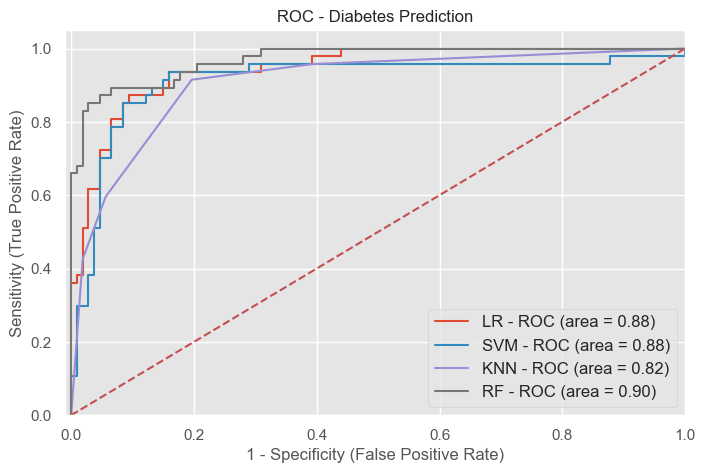

In [356]:
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'RF',
    'model': rand_clf,
}
]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()


[88.96, 88.96, 83.77, 90.91]
[88.48, 87.88, 81.76, 89.88000000000001]


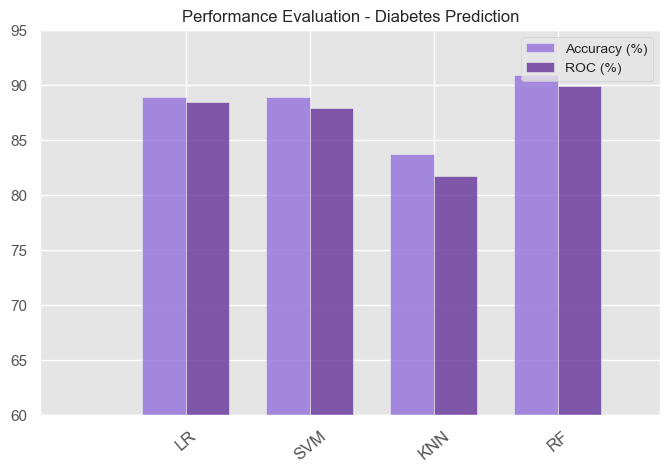

In [357]:

models = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn},
    {'label': 'RF', 'model': rand_clf},
]

# Lists to store results
means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(svc_acc,4),
                  100*round(knn_acc,4), 100*round(rand_acc,4)]

# Loop through models and calculate accuracy and ROC-AUC
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
    auc = 100 * round(auc, 4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# Number of groups (models)
n_groups = 4  # Update this to 4 since there are 4 models

# Data to plot
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

# Plot bars for accuracy and ROC
rects1 = plt.bar(index, means_accuracy, bar_width, alpha=opacity, color='mediumpurple', label='Accuracy (%)')
rects2 = plt.bar(index + bar_width, means_roc, bar_width, alpha=opacity, color='rebeccapurple', label='ROC (%)')

# Set axis limits
plt.xlim([-1, 4])  # Adjust to fit 4 bars
plt.ylim([60, 95])

# Add title and labels
plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index + bar_width / 2, ('LR', 'SVM', 'KNN', 'RF'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)

# Save the plot as an image
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')

# Display the plot
plt.show()

## **Unsupervised Learning** (Clustering & PCA)

####  **Standardize**

In [358]:
# Drop Outcome for unsupervised learning
X_unsupervised = df.drop(columns=['Outcome'])

# Standardize all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)

In [359]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X_unsupervised.columns)
print(X_scaled_df.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.864625      -0.031324       0.665181  0.308584  0.147101   
1    -0.844885 -1.204727      -0.527333      -0.010112 -0.443524 -0.870676   
2     1.233880  2.014265      -0.692669       0.327535  0.308584 -1.306866   
3    -0.844885 -1.073339      -0.527333      -0.685405 -0.533328 -0.579883   
4    -1.141852  0.503310      -2.676706       0.665181  0.297359  1.601067   

   DiabetesPedigreeFunction       Age  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                 -0.258244  1.425995               0.0          0.382451   
1                 -0.258244 -0.190672               0.0          0.382451   
2                 -0.258244 -0.105584               0.0          0.382451   
3                 -0.258244 -1.041549               0.0          0.382451   
4                  6.953818 -0.020496               0.0         -2.614715   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0     

### **K-Means**

#### **Elbow** **Method**

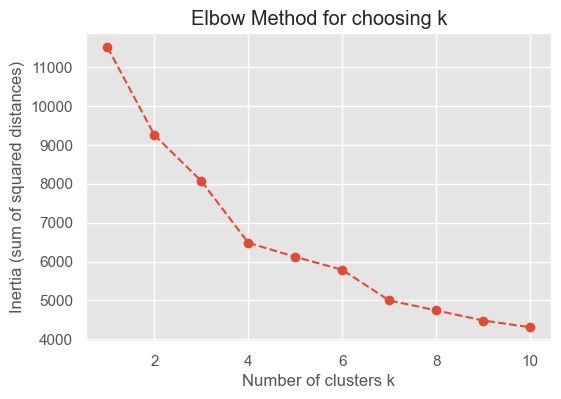

In [360]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertias, 'o--', markersize=6)
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (sum of squared distances)')
plt.title('Elbow Method for choosing k')
plt.show()


#### **Silhouette Analysis** (higher = better separation)

In [361]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

best_k = None
best_score = -1

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best K: {best_k} with Silhouette Score: {best_score:.3f}")


K=2, Silhouette Score=0.226
K=3, Silhouette Score=0.225
K=4, Silhouette Score=0.269
K=5, Silhouette Score=0.242
K=6, Silhouette Score=0.228
K=7, Silhouette Score=0.239
K=8, Silhouette Score=0.245
K=9, Silhouette Score=0.249
K=10, Silhouette Score=0.242
Best K: 4 with Silhouette Score: 0.269


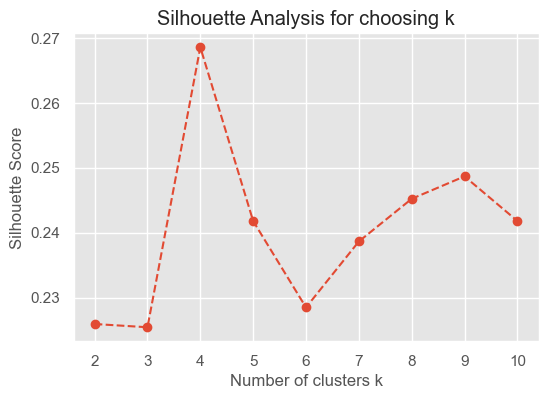

In [362]:
from sklearn.metrics import silhouette_score

sil_scores = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(K, sil_scores, 'o--', markersize=6)
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for choosing k')
plt.show()


#### **Applying Kmeans**

In [363]:
# Choosing number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels back to dataframe if needed
df['KMeans_Cluster'] = kmeans_labels
(unique, counts) = np.unique(kmeans_labels, return_counts=True)
print("K-Means cluster counts:", dict(zip(unique, counts)))

K-Means cluster counts: {0: 180, 1: 259, 2: 231, 3: 98}


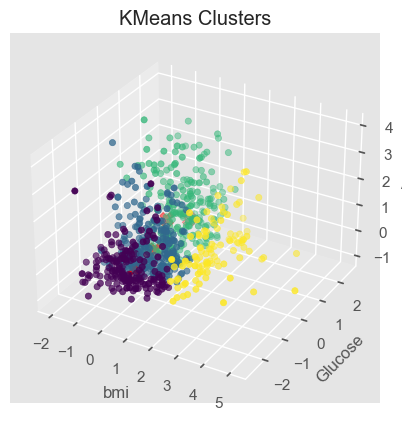

In [364]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=0)
labels_kmeans = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# Add labels to DataFrame
df['KMeans_Cluster'] = labels_kmeans

# Select 3 features for 3D plotting
x = X_scaled[:, 5]  # e.g., BMI
y = X_scaled[:, 1]  # e.g., Glucose
z = X_scaled[:, 7]  # e.g., Age

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=labels_kmeans, cmap='viridis', s=20)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='X', c='red', s=100)
ax.set_title('KMeans Clusters')
ax.set_xlabel('bmi')
ax.set_ylabel('Glucose')
ax.set_zlabel('Age')
plt.show()


#### **Applying PCA on KMeans clusters**

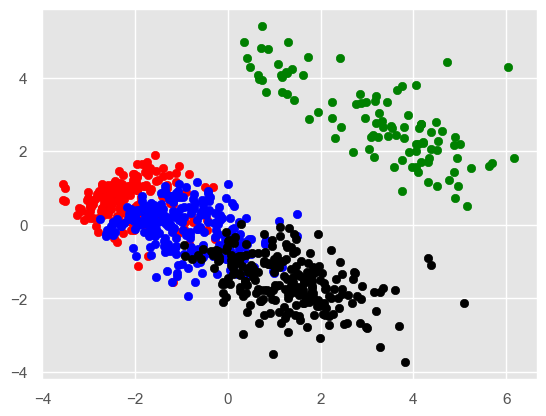

In [365]:
acp= PCA(n_components=2).fit_transform (X_scaled)
for couleur,k in zip(['red','blue','black','green'],[0,1,2,3]):
    plt.scatter (acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

### **DBSCAN**

 #### **k-distance graph**

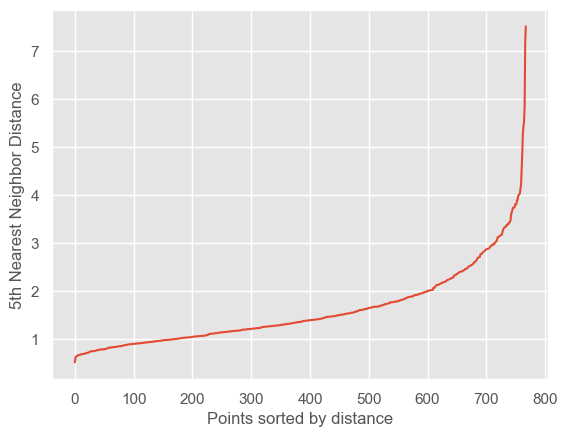

In [366]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()


#### **Grid search over eps and min_samples**

In [367]:
from sklearn.cluster import DBSCAN

best_params = None
best_score = -1

for eps in [0.5, 1, 1.5, 2]:
    for min_samples in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        if len(set(labels)) > 1 and -1 in labels:
            mask = labels != -1  # exclude noise points
            score = silhouette_score(X_scaled[mask], labels[mask])
            print(f"eps={eps}, min_samples={min_samples}, Silhouette={score:.3f}")
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print(f"Best DBSCAN params: eps={best_params[0]}, min_samples={best_params[1]}, Silhouette={best_score:.3f}")


eps=0.5, min_samples=3, Silhouette=0.824
eps=1, min_samples=3, Silhouette=0.323
eps=1, min_samples=5, Silhouette=0.390
eps=1, min_samples=10, Silhouette=0.549
eps=1.5, min_samples=3, Silhouette=0.284
eps=1.5, min_samples=5, Silhouette=0.316
eps=1.5, min_samples=10, Silhouette=0.342
eps=2, min_samples=3, Silhouette=0.294
eps=2, min_samples=5, Silhouette=0.305
eps=2, min_samples=10, Silhouette=0.310
Best DBSCAN params: eps=0.5, min_samples=3, Silhouette=0.824


#### **Applying DBSCAN**

In [368]:
dbscan = DBSCAN(eps=1.0, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add cluster labels back to dataframe if needed
df['DBSCAN_Cluster'] = dbscan_labels
(unique, counts) = np.unique(dbscan_labels, return_counts=True)
print("DBSCAN cluster counts:", dict(zip(unique, counts)))

DBSCAN cluster counts: {-1: 616, 0: 73, 1: 79}


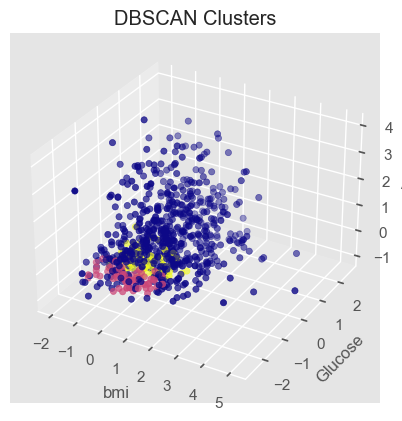

In [369]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Add labels to DataFrame
df['DBSCAN_Cluster'] = labels_dbscan

# 3D plot (same features as above)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=labels_dbscan, cmap='plasma', s=20)
ax.set_title('DBSCAN Clusters')
ax.set_xlabel('bmi')
ax.set_ylabel('Glucose')
ax.set_zlabel('Age')
plt.show()


#### **Applying PCA on DBSCAN clusters**

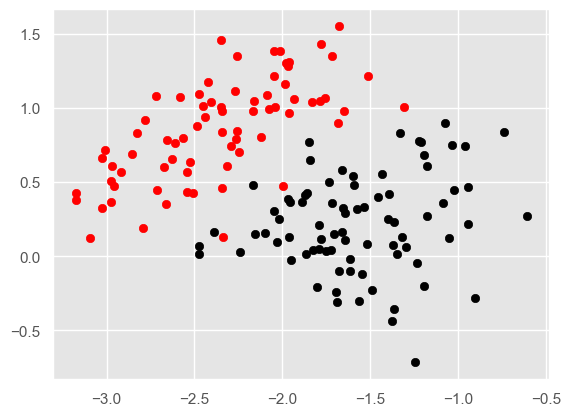

In [370]:
acp= PCA(n_components=2).fit_transform (X_scaled)
for couleur,k in zip(['red','black','green'],[0,1,2]):
    plt.scatter (acp[dbscan.labels_==k,0],acp[dbscan.labels_==k,1],c=couleur)
plt.show()

### CAH

In [371]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [372]:
z = linkage(X_scaled,method='ward',metric='euclidean')

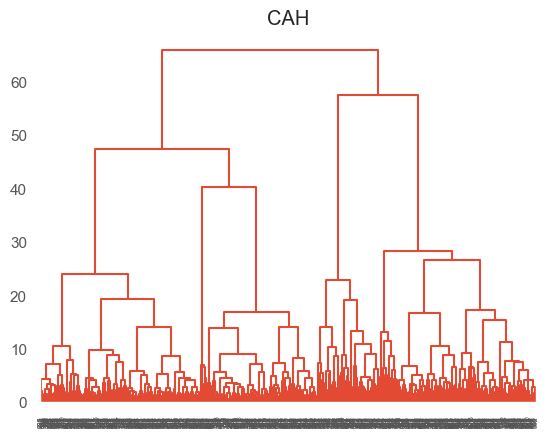

In [373]:
dendrogram(z,labels=df.index,orientation='top',color_threshold=0)
plt.title("CAH")
plt.show()

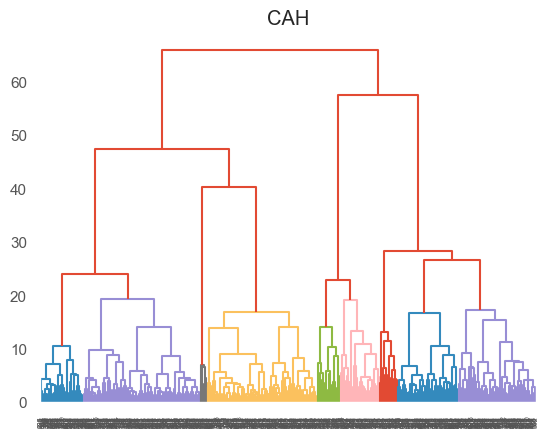

In [374]:
dendrogram(z,labels=df.index,orientation='top',color_threshold=20)
plt.title("CAH")
plt.show()

In [375]:
from scipy.cluster.hierarchy import fcluster

# Z is your linkage matrix
max_d = 48  # lets choose the height where we can see a big jump
cah_labels = fcluster(z, t=max_d, criterion='distance')
print(f"You get {len(np.unique(cah_labels))} clusters")
# Add cluster labels back to dataframe if needed
df['cah_Cluster'] = cah_labels
(unique, counts) = np.unique(cah_labels, return_counts=True)
print("CAH cluster counts:", dict(zip(unique, counts)))


You get 3 clusters
CAH cluster counts: {1: 429, 2: 97, 3: 242}


For a diabetes dataset, we choose using 3 clusters because we can have categories such as (normal, pre-diabetic, diabetic).

In [376]:
groupes_cah_4 = fcluster(z,t=48,criterion='distance')
id_groupe_tri = np.argsort(groupes_cah_4)
print ("regroupement avec CAH:")
group_class_CAH=df.groupby(groupes_cah_4)
nbr_indv_per_Class_CAH = group_class_CAH.size()
print (nbr_indv_per_Class_CAH)
print ("regroupement avec Kmeans")
group_class_kmeans=df.groupby(kmeans.labels_)
nbr_indv_per_Class_kmeans = group_class_kmeans.size()
print (nbr_indv_per_Class_kmeans)
print ("regroupement avec dbscan")
group_class_dbscan=df.groupby(dbscan.labels_)
nbr_indv_per_Class_dbscan = group_class_dbscan.size()
print (nbr_indv_per_Class_dbscan)

regroupement avec CAH:
1    429
2     97
3    242
dtype: int64
regroupement avec Kmeans
0    180
1    259
2    231
3     98
dtype: int64
regroupement avec dbscan
-1    616
 0     73
 1     79
dtype: int64


### **Comparison**

In [377]:
print(df[['KMeans_Cluster', 'DBSCAN_Cluster', 'cah_Cluster']].head())

   KMeans_Cluster  DBSCAN_Cluster  cah_Cluster
0               2              -1            3
1               0               0            1
2               2              -1            3
3               0               0            1
4               3              -1            2


In [378]:
from sklearn.metrics import silhouette_score

# Mask for the non-noise points
mask = (dbscan_labels != -1)

# Subset both features and labels
X_core = X_scaled[mask]
labels_core = dbscan_labels[mask]

sil_km = silhouette_score(X_scaled, kmeans_labels)
sil_db = silhouette_score(X_core, labels_core)
sil_cah= silhouette_score(X_scaled, cah_labels)

print(f"Silhouette K-Means: {sil_km:.3f}")
print(f"Silhouette DBSCAN: {sil_db:.3f}")
print(f"Silhouette CAH: {sil_cah:.3f}")


Silhouette K-Means: 0.269
Silhouette DBSCAN: 0.549
Silhouette CAH: 0.243


| Method  | Silhouette Score | Interpretation                                 |
| ------- | ---------------- | ---------------------------------------------- |
| K-Means | 0.269            | Modest clustering, some overlap or loose edges |
| DBSCAN  | 0.549            | Much better, but still moderate clustering     |
| CAH     | 0.243            | Very modest clustering...


# **UI**